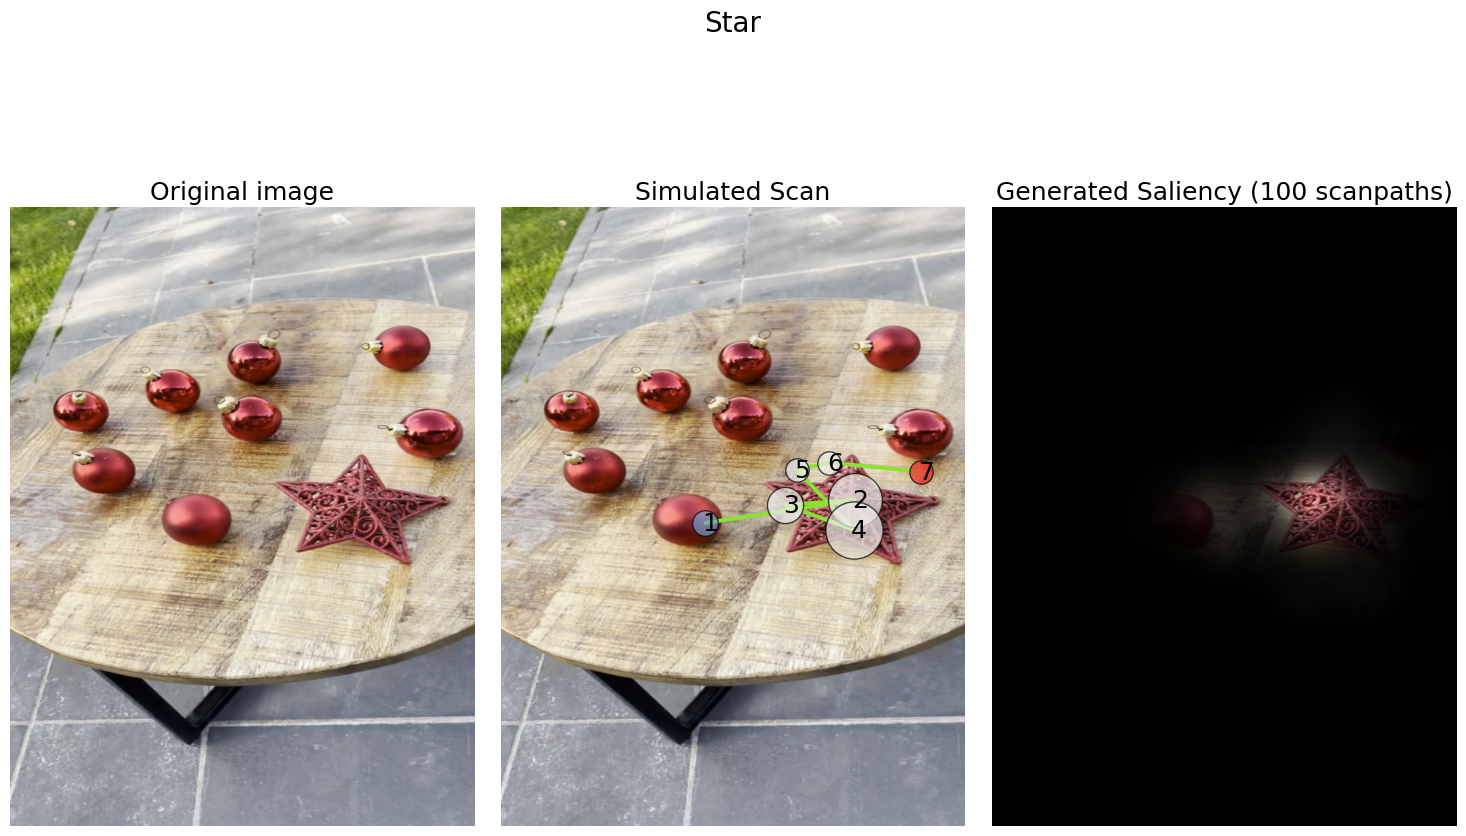

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scanDDM import scanDDM
from vis import draw_scanpath, compute_density_image, get_saccade_stats
import seaborn as sns
import cv2
sns.set_context("talk")


# Data path ----------------------------------------------------------
img_path = "data/frame_0080.png"


# Load image ---------------------------------------------------------
img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
typical_shape = (768, 1024, 3)

if img.shape != typical_shape:
    if img.shape[0] > img.shape[1]:
        img = cv2.resize(img, (768, 1024))
    else:
        img = cv2.resize(img, (1024, 768))


# Experiment Parameters ----------------------------------------------
fps = 25            #Frames per seconf
exp_dur = 2.        #Experiment duration (seconds)
n_obs = 100         #number of observers (scanpaths) to simulate


# Model Parameters ---------------------------------------------------
k = 10                  #Cauchy distribution dispersion
threshold = 1.0         #Race Model threshold
noise = 7               #Race Model diffusion strenght
eta = 17                #Race Model baseline accumulation

prompt = ["Star"]
    

# Model Definition ----------------------------------------------------
model = scanDDM(
    experiment_dur=exp_dur,
    fps=fps,
    threshold=threshold,
    noise=noise,
    kappa=k,
    eta=eta,
    device="cpu",
)

# Simulate ------------------------------------------------------------
scans, prior_map, reshaped_prior_map = model.simulate_scanpaths(
    image=img, prompt=prompt, n_observers=n_obs
)
all_scans = np.vstack(scans)
prompt = ", ".join(prompt)

# plot ----------------------------------------------------------------
sp_to_plot = 1          #idx of the simulated scanpath to plot

fig = plt.figure(tight_layout=True, figsize=(15,10))
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.axis("off")
plt.title("Original image")

plt.subplot(1, 3, 2)
plt.imshow(img)
draw_scanpath(
    scans[sp_to_plot][:, 0], scans[sp_to_plot][:, 1], scans[sp_to_plot][:, 2] * 1000
)
plt.axis("off")
plt.title("Simulated Scan")

plt.subplot(1, 3, 3)
sal = compute_density_image(all_scans[:, :2], img.shape[:2])
res = np.multiply(img, np.repeat(sal[:,:,None]/np.max(sal),3, axis=2))
res = res/np.max(res)
plt.imshow(res)
plt.axis("off")
plt.title("Generated Saliency ("+str(n_obs)+" scanpaths)")

fig.suptitle(prompt, fontsize=20)

plt.show()

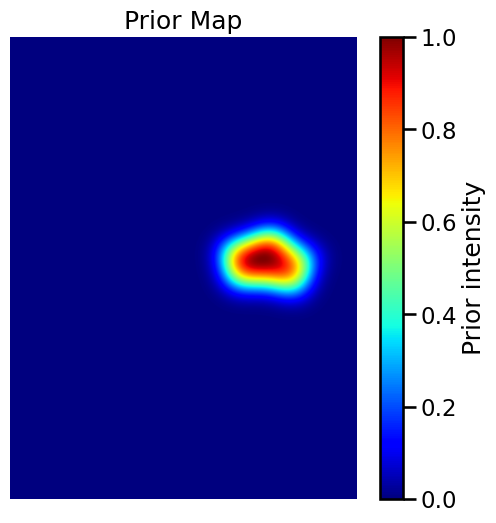

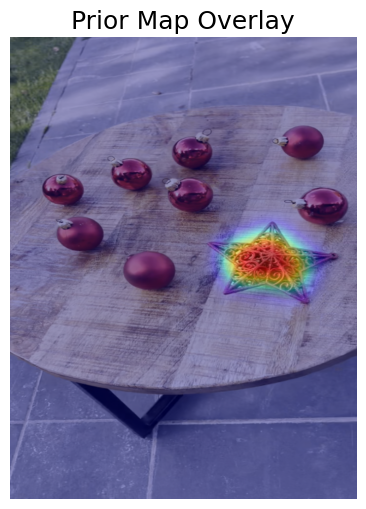

In [6]:
# ----- Display Prior Map -----
plt.figure(figsize=(6, 6))
plt.imshow(prior_map, cmap="jet")  # ou cmap="hot", "jet", etc.
plt.colorbar(label="Prior intensity")
plt.axis("off")
plt.title("Prior Map")
plt.show()

# ----- Display Prior Map + Original Image -----
plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.imshow(prior_map, cmap="jet", alpha=0.4)
plt.axis("off")
plt.title("Prior Map Overlay")
plt.show()

In [4]:
import torch

saliency_map = prior_map
saliency_map[500:600,500:600] = 0.25

saliency_map = torch.tensor(saliency_map[None,None,:,:], dtype=torch.float32, device="cpu")

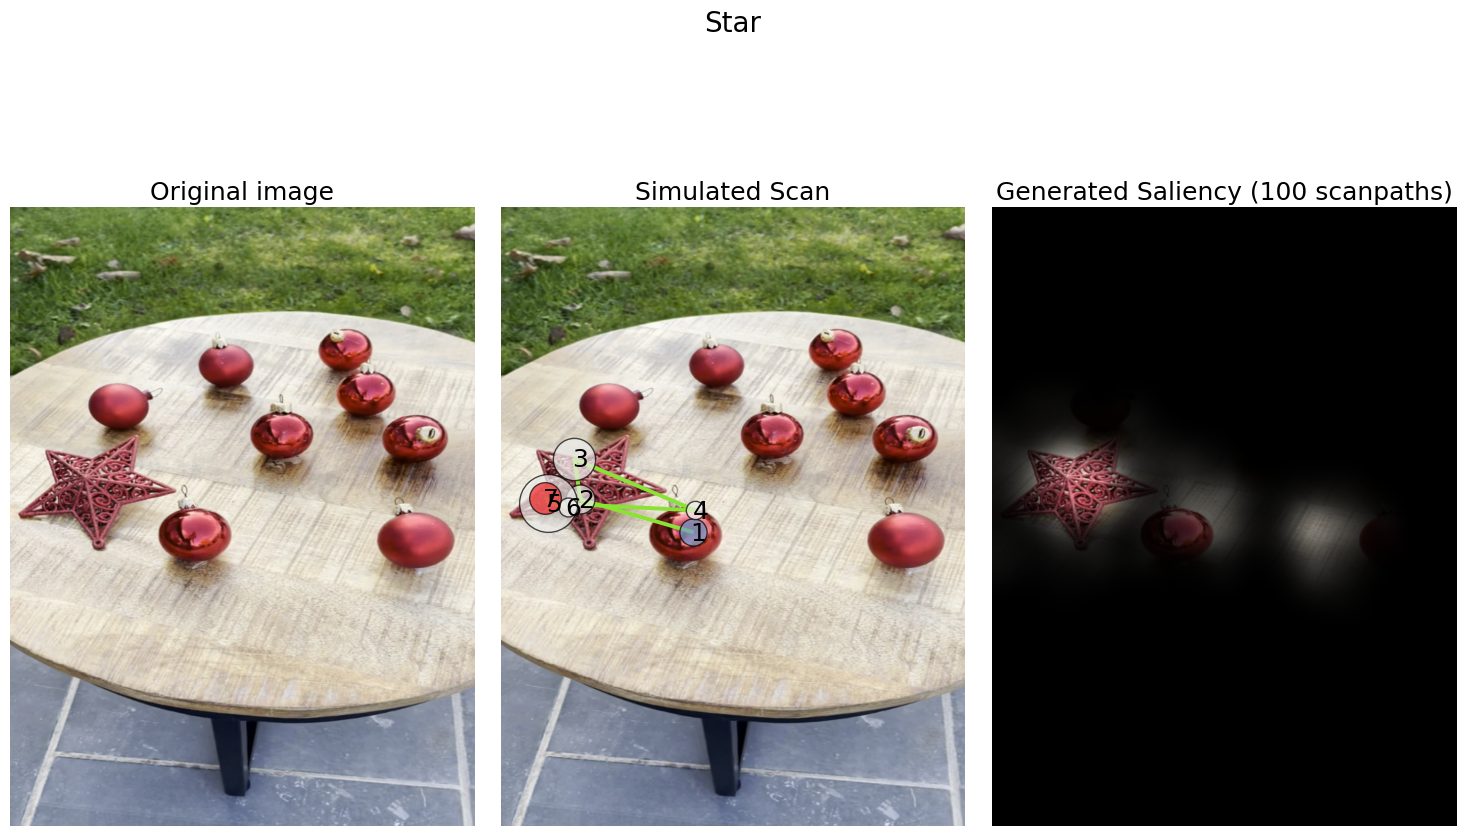

In [9]:
# Data path ----------------------------------------------------------
img_path = "data/frame_0004.png"


# Load image ---------------------------------------------------------
img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
typical_shape = (768, 1024, 3)

if img.shape != typical_shape:
    if img.shape[0] > img.shape[1]:
        img = cv2.resize(img, (768, 1024))
    else:
        img = cv2.resize(img, (1024, 768))


# Experiment Parameters ----------------------------------------------
fps = 25            #Frames per seconf
exp_dur = 2.        #Experiment duration (seconds)
n_obs = 100         #number of observers (scanpaths) to simulate


# Model Parameters ---------------------------------------------------
k = 10                  #Cauchy distribution dispersion
threshold = 1.0         #Race Model threshold
noise = 7               #Race Model diffusion strenght
eta = 17                #Race Model baseline accumulation

prompt = ["Star"]
    

# Model Definition ----------------------------------------------------
model = scanDDM(
    experiment_dur=exp_dur,
    fps=fps,
    threshold=threshold,
    noise=noise,
    kappa=k,
    eta=eta,
    device="cpu",
)

# Simulate ------------------------------------------------------------
scans, prior_map, reshaped_prior_map = model.simulate_scanpaths(
    image=img, prompt=prompt, n_observers=n_obs, saliency_map=saliency_map
)
all_scans = np.vstack(scans)
prompt = ", ".join(prompt)

# plot ----------------------------------------------------------------
sp_to_plot = 1          #idx of the simulated scanpath to plot

fig = plt.figure(tight_layout=True, figsize=(15,10))
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.axis("off")
plt.title("Original image")

plt.subplot(1, 3, 2)
plt.imshow(img)
draw_scanpath(
    scans[sp_to_plot][:, 0], scans[sp_to_plot][:, 1], scans[sp_to_plot][:, 2] * 1000
)
plt.axis("off")
plt.title("Simulated Scan")

plt.subplot(1, 3, 3)
sal = compute_density_image(all_scans[:, :2], img.shape[:2])
res = np.multiply(img, np.repeat(sal[:,:,None]/np.max(sal),3, axis=2))
res = res/np.max(res)
plt.imshow(res)
plt.axis("off")
plt.title("Generated Saliency ("+str(n_obs)+" scanpaths)")

fig.suptitle(prompt, fontsize=20)

plt.show()

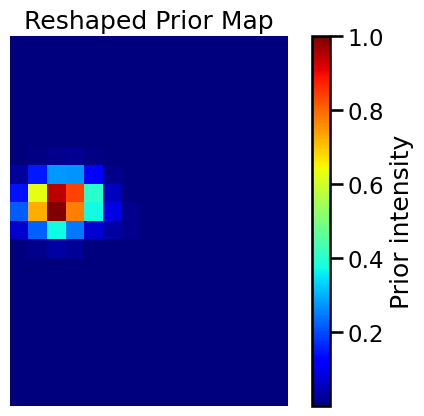

In [3]:
# ----- Display Reshaped Prior Map -----
plt.figure()
plt.imshow(reshaped_prior_map, cmap="jet")  # ou cmap="hot", "jet", etc.
plt.colorbar(label="Prior intensity")
plt.axis("off")
plt.title("Reshaped Prior Map")
plt.show()

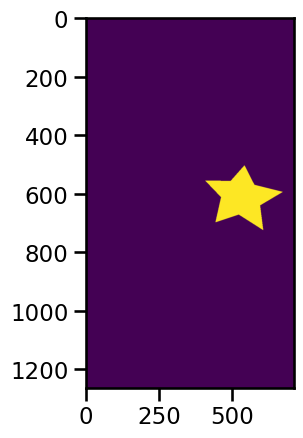

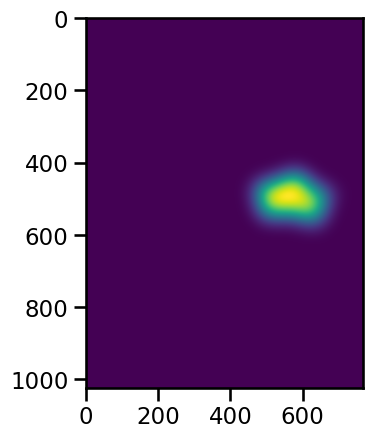

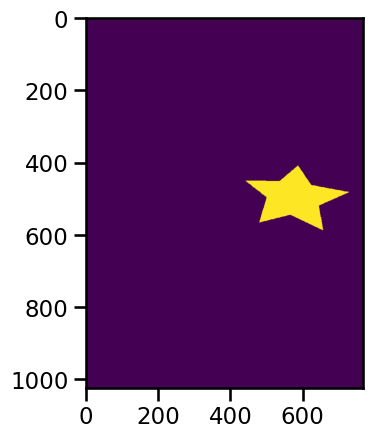

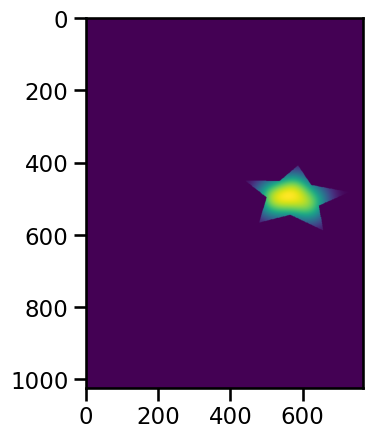

Score = 75.24658385730795%


In [ ]:
# ----- Establish a score between saliency map and target mask -----
img_target_path = "data/frame_0080_mask_target.png"
mask_target = cv2.cvtColor(cv2.imread(img_target_path), cv2.COLOR_BGR2GRAY)
mask_target = mask_target/mask_target.max()

plt.figure()
plt.imshow(mask_target)
plt.show()

plt.figure()
plt.imshow(prior_map)
plt.show()

target_size = (prior_map.shape[1], prior_map.shape[0])
mask_resized = cv2.resize(mask_target, target_size, interpolation=cv2.INTER_NEAREST)

plt.figure()
plt.imshow(mask_resized)
plt.show()

prior_map_correlation = prior_map * mask_resized

plt.figure()
plt.imshow(prior_map_correlation)
plt.show()

correlation_score = prior_map_correlation.sum() / prior_map.sum()
print(f'Score = {correlation_score*100}%')

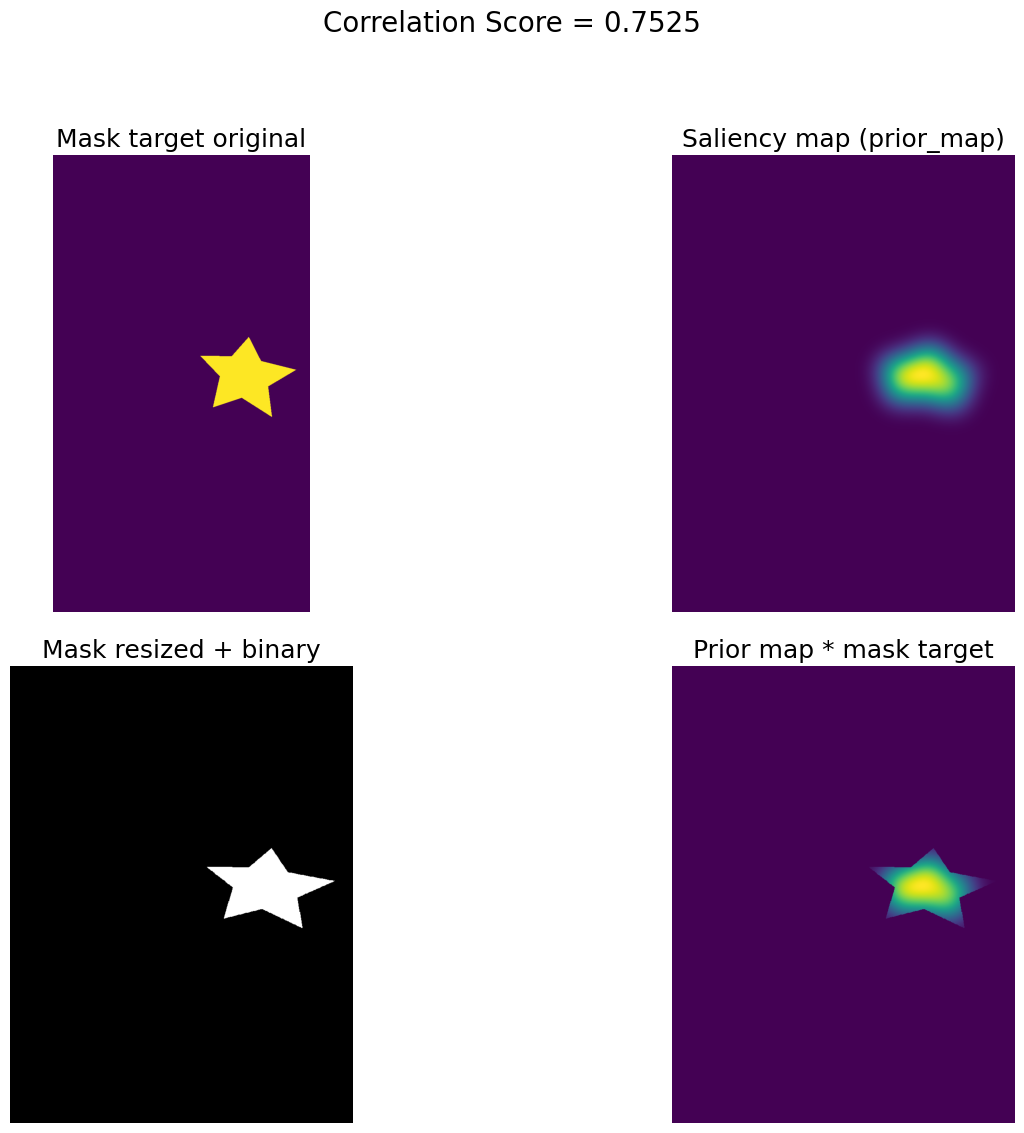

In [37]:
import matplotlib.pyplot as plt

# correlation_score est le score que tu as calculé
# prior_map, mask_target, mask_binary, prior_map_correlation sont tes arrays

plt.figure(figsize=(16,12))

# 1️⃣ Image originale / masque cible couleur
plt.subplot(2, 2, 1)
plt.imshow(mask_target)
plt.title("Mask target original")
plt.axis("off")

# 2️⃣ Saliency map générée (prior_map)
plt.subplot(2, 2, 2)
plt.imshow(prior_map, cmap='viridis')
plt.title("Saliency map (prior_map)")
plt.axis("off")

# 3️⃣ Masque redimensionné et binaire
plt.subplot(2, 2, 3)
plt.imshow(mask_binary, cmap='gray')
plt.title("Mask resized + binary")
plt.axis("off")

# 4️⃣ Multiplication élément par élément
plt.subplot(2, 2, 4)
plt.imshow(prior_map_correlation, cmap='viridis')
plt.title("Prior map * mask target")
plt.axis("off")

# Titre principal avec le score
plt.suptitle(f"Correlation Score = {correlation_score:.4f}", fontsize=20)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajuste les subplots pour ne pas chevaucher le suptitle
plt.show()
